In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as st
pd.set_option('display.max_columns',500)
%matplotlib inline

In [2]:
df = pd.read_csv('Numeros_Aleatorios.csv')

In [3]:
df.head()

,Index,Von_Neumann,Congruencias_Multiplicativas,Congruencias_Mixtas,Python
0,1,0.5126,0.12658,0.18407,0.70190
1,2,0.2758,0.08838,0.19803,0.62808
2,3,0.6065,0.04835,0.21204,0.44255
3,4,0.7842,0.20286,0.01134,0.03810
4,5,0.4969,0.06558,0.02544,0.13943


Text(0.5, 1.0, 'Método de cuadrados medios')

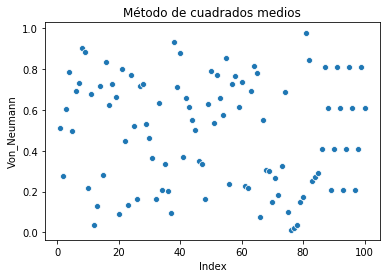

In [15]:
sns.scatterplot(x='Index', y='Von_Neumann', data=df)
plt.title('Método de cuadrados medios')

Text(0.5, 1.0, 'Método congruencial multiplicativo')

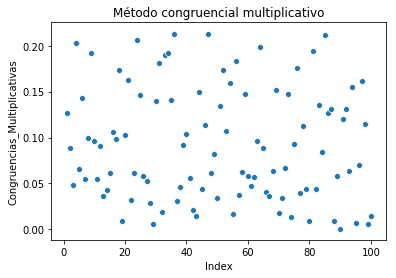

In [12]:
sns.scatterplot(x='Index', y='Congruencias_Multiplicativas', data=df)
plt.title('Método congruencial multiplicativo')

Text(0.5, 1.0, 'Método congruncial mixto')

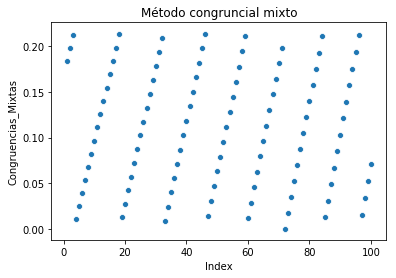

In [13]:
sns.scatterplot(x='Index', y='Congruencias_Mixtas', data=df)
plt.title('Método congruncial mixto')

Text(0.5, 1.0, 'Números generados con Python')

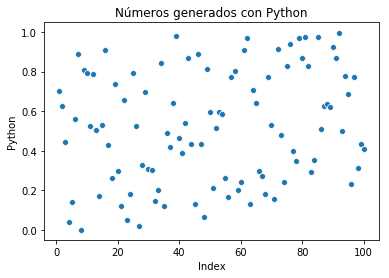

In [17]:
sns.scatterplot(x='Index', y='Python', data=df)
plt.title('Números generados con Python')

## Pruebas de uniformidad

### Ji-Cuadrada

In [16]:
tab = pd.DataFrame(index=['[0-0.1)','[0.1-0.2)','[0.2-0.3)','[0.3-0.4)','[0.4-0.5)','[0.5-0.6)','[0.6-0.7)','[0.7-0.8)',
                          '[0.8-0.9)','[0.9-1)'],columns=['FrecE','FrecO_CuMe', 'O-E_CuMe','FrecO_CoMu', 'O-E_CoMu',
                                                          'FrecO_CoMi', 'O-E_CoMi','FrecO_Py', 'O-E_Py'])

In [17]:
tab['FrecE']=10

In [18]:
freq, lower, bins, extra=st.relfreq(df.Von_Neumann, numbins=10, defaultreallimits=(0,1))
freq= freq*100
tab['FrecO_CuMe']=freq
tab['O-E_CuMe']= pow(tab['FrecO_CuMe']-tab['FrecE'],2)/tab['FrecE']

In [19]:
freq, lower, bins, extra=st.relfreq(df.Congruencias_Multiplicativas, numbins=10, defaultreallimits=(0,1))
freq= freq*100
tab['FrecO_CoMu']=freq
tab['O-E_CoMu']= pow(tab['FrecO_CoMu']-tab['FrecE'],2)/tab['FrecE']

In [20]:
freq, lower, bins, extra=st.relfreq(df.Congruencias_Mixtas, numbins=10, defaultreallimits=(0,1))
freq= freq*100
tab['FrecO_CoMi']=freq
tab['O-E_CoMi']= pow(tab['FrecO_CoMi']-tab['FrecE'],2)/tab['FrecE']

In [21]:
freq, lower, bins, extra=st.relfreq(df.Python, numbins=10, defaultreallimits=(0,1))
freq= freq*100
tab['FrecO_Py']=freq
tab['O-E_Py']= pow(tab['FrecO_Py']-tab['FrecE'],2)/tab['FrecE']

In [22]:
tab

,FrecE,FrecO_CuMe,O-E_CuMe,FrecO_CoMu,O-E_CoMu,FrecO_CoMi,O-E_CoMi,FrecO_Py,O-E_Py
[0-0.1),10,7.0,0.9,59.0,240.1,46.0,129.6,5.0,2.5
[0.1-0.2),10,10.0,0.0,36.0,67.6,47.0,136.9,11.0,0.1
[0.2-0.3),10,15.0,2.5,5.0,2.5,7.0,0.9,12.0,0.4
[0.3-0.4),10,8.0,0.4,0.0,10.0,0.0,10.0,8.0,0.4
[0.4-0.5),10,7.0,0.9,0.0,10.0,0.0,10.0,11.0,0.1
[0.5-0.6),10,8.0,0.4,0.0,10.0,0.0,10.0,12.0,0.4
[0.6-0.7),10,17.0,4.9,0.0,10.0,0.0,10.0,9.0,0.1
[0.7-0.8),10,14.0,1.6,0.0,10.0,0.0,10.0,10.0,0.0
[0.8-0.9),10,11.0,0.1,0.0,10.0,0.0,10.0,11.0,0.1
[0.9-1),10,3.0,4.9,0.0,10.0,0.0,10.0,11.0,0.1


Estadístico de prueba para los números generados con cuadrados medios

In [115]:
tab['O-E_CuMe'].sum()

16.6

Estadístico de prueba para los números generados con congruencias multiplicativas

In [116]:
tab['O-E_CoMu'].sum()

380.2

Estadístico de prueba para los números generados con congruencias mixtas

In [117]:
tab['O-E_CoMi'].sum()

337.4

Estadístico de prueba para los números generados con Python

In [118]:
tab['O-E_Py'].sum()

4.199999999999999

Región de rechazo $X^2>X^2_{0.05,9}=16.919$

### Kolmogorov-Smirnov

In [52]:
tabk = pd.DataFrame(index=range(1,101,1),columns=['F(Xi)','Xi_CuMe', 'Xi-F(Xi)_CuMe','Xi_CoMu', 'Xi-F(Xi)_CoMu',
                                                          'Xi_CoMi', 'Xi-F(Xi)_CoMi','Xi_Py', 'Xi-F(Xi)_Py'])

In [89]:
tabk['F(Xi)']=np.arange(.01,1.01,.01)

In [116]:
cume =df.Von_Neumann.to_numpy()
cume.sort()
tabk['Xi_CuMe']= cume
tabk['Xi-F(Xi)_CuMe']=abs(tabk['Xi_CuMe']-tabk['F(Xi)'])

In [131]:
comu = df.Congruencias_Multiplicativas.to_numpy()
comu.sort()
tabk['Xi_CoMu']= df.Congruencias_Multiplicativas.sort_values()
tabk['Xi-F(Xi)_CoMu']=abs(tabk['Xi_CoMu']-tabk['F(Xi)'])

In [132]:
comi = df.Congruencias_Mixtas.to_numpy()
comi.sort()
tabk['Xi_CoMi']= df.Congruencias_Mixtas.sort_values()
tabk['Xi-F(Xi)_CoMi']=abs(tabk['Xi_CoMi']-tabk['F(Xi)'])

In [121]:
py = df.Python.to_numpy()
py.sort()
tabk['Xi_Py']= py
tabk['Xi-F(Xi)_Py']=abs(tabk['Xi_Py']-tabk['F(Xi)'])

In [133]:
tabk

,F(Xi),Xi_CuMe,Xi-F(Xi)_CuMe,Xi_CoMu,Xi-F(Xi)_CoMu,Xi_CoMi,Xi-F(Xi)_CoMi,Xi_Py,Xi-F(Xi)_Py
1,0.01,0.0140,4.000000e-03,0.00525,0.00475,0.00928,0.00072,0.00100,0.00900
2,0.02,0.0196,4.000000e-04,0.00606,0.01394,0.01134,0.00866,0.02006,0.00006
3,0.03,0.0362,6.200000e-03,0.00674,0.02326,0.01241,0.01759,0.03810,0.00810
4,0.04,0.0384,1.600000e-03,0.00864,0.03136,0.01286,0.02714,0.04866,0.00866
5,0.05,0.0742,2.420000e-02,0.00893,0.04107,0.01333,0.03667,0.06228,0.01228
6,0.06,0.0896,2.960000e-02,0.00916,0.05084,0.01468,0.04532,0.12133,0.06133
7,0.07,0.0965,2.650000e-02,0.01387,0.05613,0.01536,0.05464,0.12183,0.05183
8,0.08,0.1007,2.070000e-02,0.01423,0.06577,0.01790,0.06210,0.12937,0.04937
9,0.09,0.1310,4.100000e-02,0.01501,0.07499,0.02470,0.06530,0.13123,0.04123
10,0.10,0.1331,3.310000e-02,0.01710,0.08290,0.02544,0.07456,0.13943,0.03943


In [125]:
tabk['Xi-F(Xi)_CuMe'].max()

0.1028

In [126]:
tabk['Xi-F(Xi)_CoMu'].max()

0.77678

In [96]:
tabk['Xi-F(Xi)_CoMi'].max()

0.94464

In [123]:
tabk['Xi-F(Xi)_Py'].max()

0.06132999999999999

$D_{0.05,100}=\frac{1.36}{\sqrt{100}}=0.136$

## Pruebas de independencia

### Prueba de corridas arriba y abajo

In [64]:
lista=[None]*100

In [5]:
def pcaya(a,b):
    if(a<=b):
        return 1
    else:
        return 0

In [13]:
def cont_rachas(l):
    rachas=0
    for i in range(0,len(l)-1):
        if(l[i]!=l[i+1]):
            rachas=rachas+1
    return rachas

In [21]:
for i in range(1,100):
    lista[i-1]=pcaya(df.Von_Neumann.loc[i-1],df.Von_Neumann.loc[i])

In [22]:
r_cume = cont_rachas(lista)
r_cume

56

In [23]:
for i in range(1,100):
    lista[i-1]=pcaya(df.Congruencias_Multiplicativas.loc[i-1],df.Congruencias_Multiplicativas.loc[i])

In [24]:
r_comu = cont_rachas(lista)
r_comu 

65

In [25]:
for i in range(1,100):
    lista[i-1]=pcaya(df.Congruencias_Mixtas.loc[i-1],df.Congruencias_Mixtas.loc[i])

In [26]:
r_comi = cont_rachas(lista)
r_comi 

16

In [27]:
for i in range(1,100):
    lista[i-1]=pcaya(df.Python.loc[i-1],df.Python.loc[i])

In [28]:
r_py = cont_rachas(lista)
r_py

60

In [30]:
mu = (2*100-1)/3
mu

66.33333333333333

In [34]:
sigma = math.sqrt((16*100-29)/90)
sigma

4.1779846284489315

$Z_{0.025}= \pm 1.96$

Estadístico para cuadadros medios

In [37]:
z = abs((r_cume-mu)/sigma)
z

2.473281797872377

Se rechaza la hipótesis nula ya que $2.47>1.96$, por lo que los números no son independientes

Estadístico para congruencias multiplicativas

In [38]:
z = abs((r_comu-mu)/sigma)
z

0.319133135209338

No se rechaza la hipótesis nula, por lo que los números son independientes

Estadístico para congruencias mixtas

In [39]:
z = abs((r_comi-mu)/sigma)
z

12.04727585415255

Se rechaza la hipótesis nula ya que $12.047>1.96$, por lo que los números no son independientes

Estadístico para Python

In [40]:
z = abs((r_py-mu)/sigma)
z

1.5158823922443596

No se rechaza la hipótesis nula, por lo que los números son independientes

### Prueba de corridas arriba y debajo de la media

In [56]:
def pcayam(a):
    if(a>.5):
        return 1
    else:
        return 0

In [85]:
for i in range(0,100):
    lista[i]=pcayam(df.Von_Neumann.loc[i])

In [68]:
u_cume = lista.count(1)
c_cume = lista.count(0)
print("Unos:",u_cume," \t Ceros:", c_cume)

Unos: 53  	 Ceros: 47


In [82]:
mu = ((2*u_cume*c_cume)/100) +0.5
mu

50.32

In [84]:
sigma = math.sqrt(((2*u_cume*c_cume)*(2*u_cume*c_cume-100))/(100*100*99))
sigma

4.956591774617113

In [86]:
r_cume = cont_rachas(lista)

Estadístico de prueba cuadrados medios

In [87]:
z = (r_cume-mu)/sigma
z

-1.6785727730508337

Se acepta la hipótesis nula, por lo que los datos son independientes

In [71]:
for i in range(0,100):
    lista[i]=pcayam(df.Congruencias_Multiplicativas.loc[i])

In [73]:
u_comu = lista.count(1)
c_comu = lista.count(0)
print("Unos:",u_comu," \t Ceros:", c_comu)

Unos: 0  	 Ceros: 100


In [88]:
mu = ((2*u_comu*c_comu)/100) +0.5
mu

0.5

In [89]:
sigma = math.sqrt(((2*u_comu*c_comu)*(2*u_comu*c_comu-100))/(100*100*99))
sigma

0.0

In [90]:
r_comu = cont_rachas(lista)

Estadístico de prueba cuadrados medios

In [92]:
z = (r_comu-mu)/sigma
z

ZeroDivisionError: float division by zero

El valor del estadístico de prueba tiende a infinito, por lo que no se acepta la hipótesis nula, así que los datos no son independientes

In [93]:
for i in range(0,100):
    lista[i]=pcayam(df.Congruencias_Mixtas.loc[i])

In [94]:
u_comi = lista.count(1)
c_comi = lista.count(0)
print("Unos:",u_comi," \t Ceros:", c_comi)

Unos: 0  	 Ceros: 100


In [95]:
mu = ((2*u_comi*c_comi)/100) +0.5
mu

0.5

In [96]:
sigma = math.sqrt(((2*u_comi*c_comi)*(2*u_comi*c_comi-100))/(100*100*99))
sigma

0.0

In [86]:
r_comi = cont_rachas(lista)

Estadístico de prueba cuadrados medios

In [97]:
z = (r_comi-mu)/sigma
z

ZeroDivisionError: float division by zero

El valor del estadístico de prueba tiende a infinito, por lo que no se acepta la hipótesis nula, así que los datos no son independientes

In [98]:
for i in range(0,100):
    lista[i]=pcayam(df.Python.loc[i])

In [99]:
u_py = lista.count(1)
c_py = lista.count(0)
print("Unos:",u_py," \t Ceros:", c_py)

Unos: 53  	 Ceros: 47


In [100]:
mu = ((2*u_py*c_py)/100) +0.5
mu

50.32

In [101]:
sigma = math.sqrt(((2*u_py*c_py)*(2*u_py*c_py-100))/(100*100*99))
sigma

4.956591774617113

In [102]:
r_py = cont_rachas(lista)

Estadístico de prueba cuadrados medios

In [104]:
z = (r_py-mu)/sigma
z

-0.6698150969385539

Se acepta la hipótesis nula, por lo que los datos son independientes

### De series

### De Póker

### De huecos

## Media

In [115]:
print("Intervalo de aceptación \n (",0.5-1.96*(1/(math.sqrt(12*100))),",",0.5+1.96*(1/(math.sqrt(12*100))),")")

Intervalo de aceptación 
 ( 0.4434196736194167 , 0.5565803263805833 )


Media de los números aletorios obtenidos con cuadrados medios

In [116]:
df.Von_Neumann.mean()

0.48796799999999996

Se acepta la hipótesis de media 0.5

Media de los números aletorios obtenidos con congruencias multiplicativas

In [118]:
df.Congruencias_Multiplicativas.mean()

0.09230379999999999

Media de los números aletorios obtenidos con congruencias mixtas

In [120]:
df.Congruencias_Mixtas.mean()

0.10956599999999994

No se acepta la hipótesis de media 0.5

Media de los números aletorios obtenidos con Python

In [122]:
df.Python.mean()

0.5221311

Se acepta la hipótesis nula de media 0.5

## Varianza

In [125]:
print("Intervalo de aceptación \n (",73.36/(12*100-1),",",128.42/(12*100-1),")")

Intervalo de aceptación 
 ( 0.061184320266889074 , 0.10710592160133443 )


Varianza de los números aletorios obtenidos con cuadrados medios

In [126]:
df.Von_Neumann.var()

0.07023942179393936

Varianza de los números aletorios obtenidos con congruencias multiplicativas

In [128]:
df.Congruencias_Multiplicativas.var()

0.0037122240197575763

Varianza de los números aletorios obtenidos con congruencias mixtas

In [129]:
df.Congruencias_Mixtas.var()

0.004052640559595961

Varianza de los números aletorios obtenidos con Python

In [127]:
df.Python.var()

0.0799264686098889

### Conclusión

El mejor generador de números aleatorios es Python